<h1>Project 1 on Machine Learning, deadline October 7 (midnight), 2024</h1>

<h2>Franke function</h2>

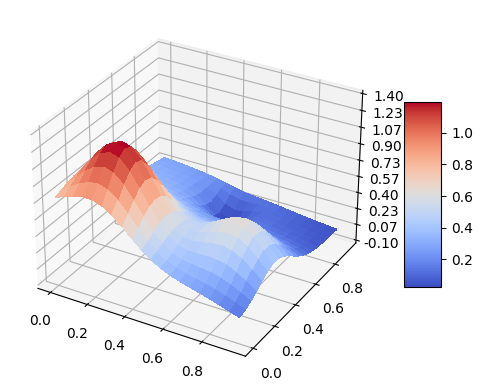

In [119]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

<h2>Part a) : Ordinary Least Square (OLS) on the Franke function</h2>

In [120]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


np.random.seed(0)

# Generate data.
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
xm, ym = np.meshgrid(x,y)

def FrankeFunction(x, y, noisefactor=0.0):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4 + noisefactor*np.random.randn(x.shape[0], y.shape[1])

z = FrankeFunction(xm, ym)

x_flat = xm.flatten()
y_flat = ym.flatten()
z_flat = z.flatten()

#create a 5 degree poylnomial model for plotting
degree = 5
def create_design_matrix(x, y, degree):
    polydegs = sum(i for i in range(1, degree + 2)) # Number of combinations in polynomial
    
    X = np.ones((len(x), polydegs))
    column = 0
    for i in range(degree + 1):
        for j in range(degree + 1 - i):
            # Create design matrix with columns 1, x, y, x^2, xy, y^2, x^3, x^2y, xy^2, y^3, ...
            input = (x**i * y**j)
            X[:,column] = input
            column += 1
    return X

X = create_design_matrix(x_flat, y_flat, degree)

# Split the data
X_train, X_test, z_train, z_test = train_test_split(X, z_flat, test_size=0.2, random_state=0)

#Calculate MSE and R2 for both scaled and unscaled data

#start with unscaled data | standardscaling(-= mean)
X_train_scaled = X_train.copy()
X_train_scaled[:,1:] = X_train[:,1:] - np.mean(X_train[:,1:], axis=0)

# OLS regression
beta = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ z_train

# MSE and R2 score
z_model = X @ beta
mse = mean_squared_error(z_flat, z_model)
r2 = r2_score(z_flat, z_model)
print('5 degree polynomial model')
print(f"MSE standardscaled: {mse:.4f}")
print(f"R2 standardscaled: {r2:.4f}")

#compare with minmaxscaling
X_train_scaled = X_train.copy()
X_train_max = np.max(X_train[:,1:])
X_train_min = np.min(X_train[:,1:])

X_train_scaled[:,1:] = (X_train[:,1:] - X_train_min) / (X_train_max - X_train_min)

# OLS regression
beta = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ z_train

# MSE and R2 score
z_model = X @ beta
mse = mean_squared_error(z_flat, z_model)
r2 = r2_score(z_flat, z_model)
print(f"MSE minmaxscaled: {mse:.4f}")
print(f"R2 minmaxscaled: {r2:.4f}")


# OLS regression
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train

# MSE and R2 score
z_model = X @ beta
mse = mean_squared_error(z_flat, z_model)
r2 = r2_score(z_flat, z_model)
print(f"MSE unscaled: {mse:.4f}")
print(f"R2 unscaled: {r2:.4f}")




5 degree polynomial model
MSE standardscaled: 0.0023
R2 standardscaled: 0.9720
MSE minmaxscaled: 0.0021
R2 minmaxscaled: 0.9747
MSE unscaled: 0.0021
R2 unscaled: 0.9747


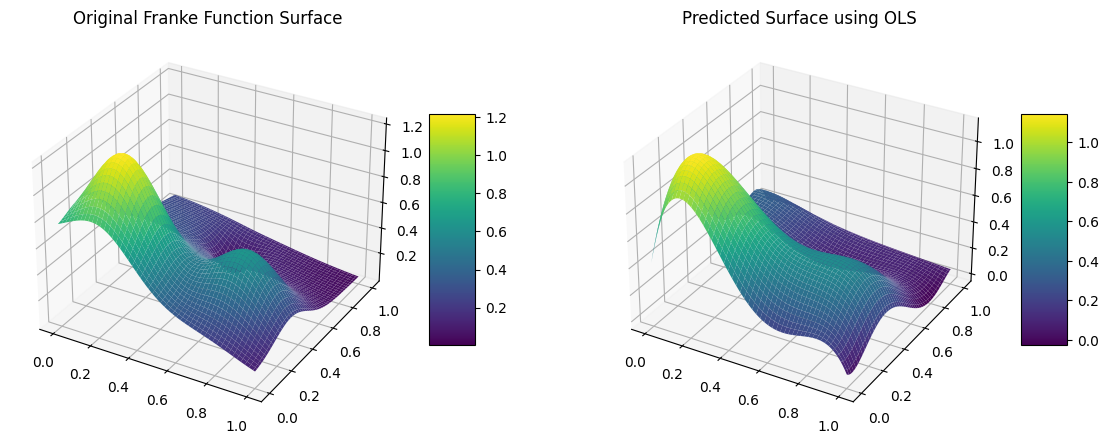

In [121]:
'''Since there was no significant difference between scaled and unscaled data, I will plot with unscaled data'''

fig = plt.figure(figsize=(14, 6))
# Original surface
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(xm, ym, z, cmap='viridis')
ax1.set_title("Original Franke Function Surface")
fig.colorbar(surf1, shrink=0.5, aspect=5)

# Predicted surface
z_model = z_model.reshape(n, n)

ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(xm, ym, z_model, cmap='viridis')
ax2.set_title("Predicted Surface using OLS")
fig.colorbar(surf2, shrink=0.5, aspect=5)
plt.show()


Best MSE: 0.0023 at degree: 5
Best R2: 0.9734 at degree: 5


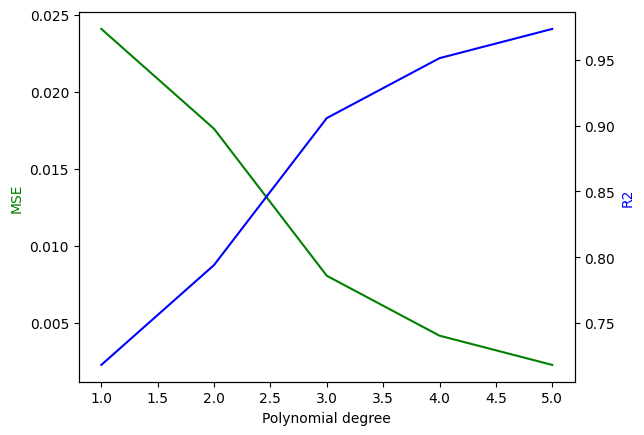

<function matplotlib.pyplot.show(close=None, block=None)>

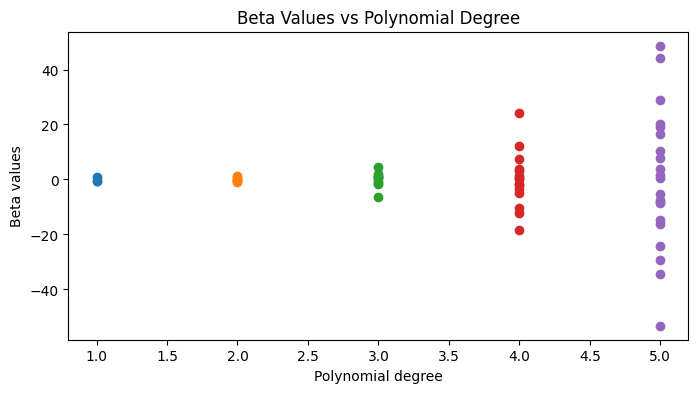

In [122]:
#Calculate and plot MSE and R2 score as a function of the polynomial degree, Also plot the beta values


maxdegree = 5
degrees = np.arange(1, maxdegree+1)
mse = []
r2 = []
beta_values = []
BestVals = {}


for d in degrees:
    # Create design matrix for each degree
    X = create_design_matrix(x_flat, y_flat, d)

    # Split the data
    X_train, X_test, z_train, z_test = train_test_split(X, z_flat, test_size=0.2, random_state=42)

    # Scale
    X_train_scaled = X_train.copy()
    X_train_scaled[:,1:] = X_train[:,1:] - np.mean(X_train[:,1:], axis=0)


    beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train
    z_pred = X_test @ beta

    mse.append(mean_squared_error(z_test, z_pred))

    r2.append(r2_score(z_test, z_pred))

    beta_values.append(beta)


#print best mse and r2
print(f"Best MSE: {np.min(mse):.4f} at degree: {degrees[np.argmin(mse)]}")
print(f"Best R2: {np.max(r2):.4f} at degree: {degrees[np.argmax(r2)]}")
BestVals['MSE OLS'] = np.min(mse)
BestVals['R2 OLS'] = np.max(r2)


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(degrees, mse, 'g-')
ax2.plot(degrees, r2, 'b-')
ax1.set_xlabel('Polynomial degree')
ax1.set_ylabel('MSE', color='g')
ax2.set_ylabel('R2', color='b')
plt.show()



fig = plt.figure(figsize=(8, 4))
for i, betas in enumerate(beta_values):
    plt.scatter([degrees[i]] * len(betas), betas, label=f'Degree {degrees[i]}')
plt.xlabel(r'Polynomial degree')
plt.ylabel(r'Beta values')
plt.title('Beta Values vs Polynomial Degree')
plt.show




Note for us:
Larger polynomial degrees -> larger beta values

<h2>Part b): Adding Ridge regression for the Franke function
</h2>

Best MSE: 0.0115 at lambda: 0.0001
Best R2: 0.8745 at lambda: 0.0001


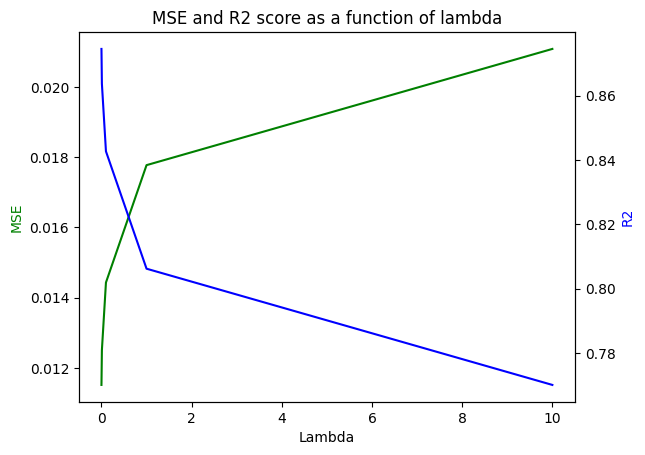

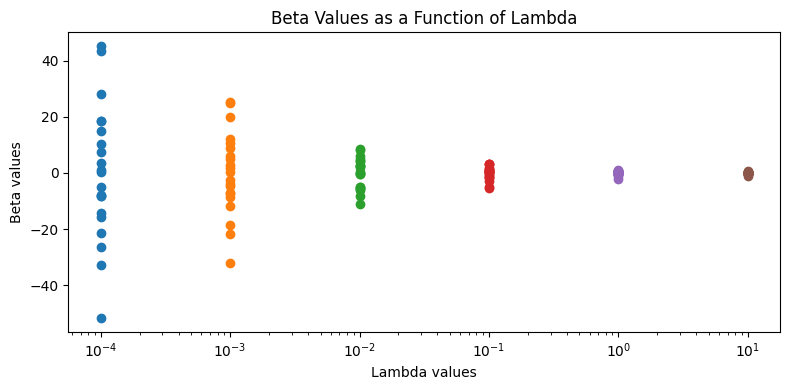

In [128]:
"""Whole process with Ridge regression on a 5 degree polynomial model with varying lambda values"""
from sklearn.linear_model import Ridge

poly_deg = 5
X = create_design_matrix(x_flat, y_flat, poly_deg)

# Split the data
X_train, X_test, z_train, z_test = train_test_split(X, z_flat, test_size=0.2, random_state=42)

# Minmax scaling
X_train_scaled = X_train.copy()
X_train_scaled[:,1:] = X_train[:,1:] - np.mean(X_train[:,1:], axis=0)
X_test_scaled = X_test.copy()
X_test_scaled[:,1:] = X_test[:,1:] - np.mean(X_test[:,1:], axis=0)



lambda_values = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]

mse = []
r2 = []
beta_values = []


for l in lambda_values:
    ridge = Ridge(alpha=l, fit_intercept=False)
    ridge.fit(X_train_scaled, z_train)
    z_pred = ridge.predict(X_test_scaled)

    mse.append(mean_squared_error(z_test, z_pred))
    r2.append(r2_score(z_test, z_pred))
    beta_values.append(ridge.coef_)


#print best mse and r2
print(f"Best MSE: {np.min(mse):.4f} at lambda: {lambda_values[np.argmin(mse)]}")
print(f"Best R2: {np.max(r2):.4f} at lambda: {lambda_values[np.argmax(r2)]}")
BestVals['MSE Ridge'] = np.min(mse)
BestVals['R2 Ridge'] = np.max(r2)
BestVals['Lambda Ridge'] = lambda_values[np.argmin(mse)]


# Plot MSE and R2 score as a function of lambda
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(lambda_values, mse, 'g-')
ax2.plot(lambda_values, r2, 'b-')
ax1.set_xlabel('Lambda')
ax1.set_ylabel('MSE', color='g')
ax2.set_ylabel('R2', color='b')
# plt.xscale('log')
plt.title('MSE and R2 score as a function of lambda')
plt.show()

fig = plt.figure(figsize=(8, 4))
for i, betas in enumerate(beta_values):
    plt.scatter([lambda_values[i]] * len(betas), betas, label=f'Lambda {lambda_values[i]}')
plt.xlabel(r'Lambda values')
plt.ylabel(r'Beta values')
plt.title('Beta Values as a Function of Lambda')
plt.xscale('log')
plt.tight_layout()
plt.show()



Note for us: Larger lambda values -> smaller beta values 

<h2>Part c) Adding Lasso for the Franke function</h2>

/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.971e-02, tolerance: 6.527e-02
  model = cd_fast.enet_coordinate_descent(


Best MSE: 0.0041 at lambda: 1e-05
Best R2: 0.9523 at lambda: 1e-05


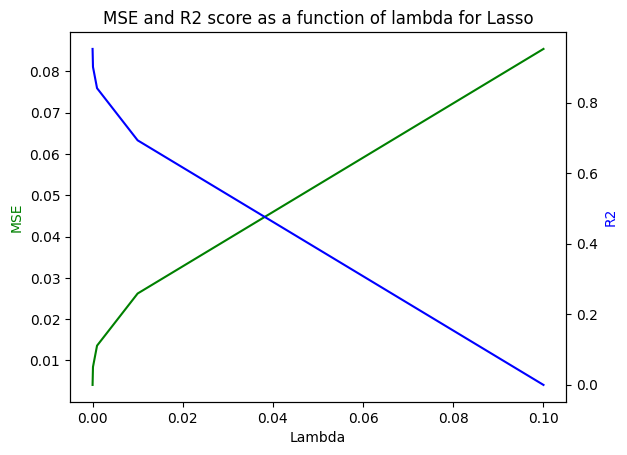

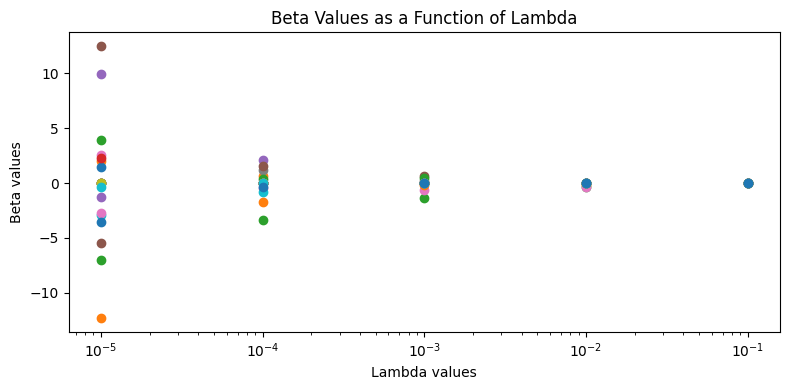

In [124]:
from sklearn.linear_model import Lasso

# Define the lambda values for Lasso regression
lambda_values = [1e-5,1e-4, 1e-3, 1e-2, 1e-1]
mse_lasso = []
r2_lasso = []
beta_values_lasso = []


# Create a Lasso model for each lambda value
for l in lambda_values:
    lasso = Lasso(alpha=l , max_iter=int(1e5), tol = 1e-4)
    lasso.fit(X_train_scaled, z_train)
    z_pred_lasso = lasso.predict(X_test_scaled)

    mse_lasso.append(mean_squared_error(z_test, z_pred_lasso))
    r2_lasso.append(r2_score(z_test, z_pred_lasso))
    beta_values_lasso.append(lasso.coef_)

# Print best MSE and R2 for Lasso
print(f"Best MSE: {np.min(mse_lasso):.4f} at lambda: {lambda_values[np.argmin(mse_lasso)]}")
print(f"Best R2: {np.max(r2_lasso):.4f} at lambda: {lambda_values[np.argmax(r2_lasso)]}")
BestVals['MSE Lasso'] = np.min(mse_lasso)
BestVals['R2 Lasso'] = np.max(r2_lasso)
BestVals['Lambda Lasso'] = lambda_values[np.argmax(r2_lasso)]


# Plot MSE and R2 score as a function of lambda
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(lambda_values, mse_lasso, 'g-')
ax2.plot(lambda_values, r2_lasso, 'b-')
ax1.set_xlabel('Lambda')
ax1.set_ylabel('MSE', color='g')
ax2.set_ylabel('R2', color='b')
plt.title('MSE and R2 score as a function of lambda for Lasso')
plt.show()


fig = plt.figure(figsize=(8, 4))
# For each beta array, plot the beta values against the lambda values
for i in range(len(beta_values[0])):  
    beta_coeffs = [beta[i] for beta in beta_values_lasso] # Extract the beta values for each lambda
    plt.scatter(lambda_values, beta_coeffs)

plt.xlabel(r'Lambda values')
plt.ylabel(r'Beta values')
plt.title('Beta Values as a Function of Lambda')
plt.xscale('log')
plt.tight_layout()
plt.show()


In [125]:
#print best mse and r2 as columns in a dataframe
for i in BestVals:
    print(i, f'{BestVals[i]:.5f}')


MSE OLS 0.00227
R2 OLS 0.97342
MSE Ridge 0.00232
R2 Ridge 0.97281
MSE Lasso 0.00407
R2 Lasso 0.95230
Lambda Lasso 0.00001


I found the best model to be the Ridge regression with $λ = 0.0001$

<h2>Part d): Paper and pencil part</h2>



There exists a continuous function $f(\mathbf{x})$ and a normal distributed error $\mathbf{\epsilon} \sim N(0,\sigma^2)$ which describes our data $\mathbf{y} = f(\mathbf{x}) + \epsilon$. We approximate the function $f$ with our model $\mathbf{\tilde{y}}= \mathbf{X\beta}$, minimized by $(\mathbf{y} - \mathbf{\tilde{y}})^2$.

Show that the expectation value of $\mathbf{y}$ for a given element in $i$:
$$\mathbb{E}(y_i) = \sum_j x_{ij}\beta_j=\mathbf{X}_{i,*}\mathbf{\beta}$$ 
and its variance is:
$$\text{Var}(y_i) = \sigma^2$$


Given $\mathbf{y} = f(\mathbf{x}) + \epsilon$ and $ \epsilon \sim N(0, \sigma^2) $

Expectation value:
$$\mathbb{E} (\mathbf{y}) = \mathbb{E}(f(\mathbf{x}) + ϵ ) = \mathbb{E}(f(\mathbf{x})) $$
Since $\mathbb{E}(\epsilon) = 0$, because we assume $\epsilon$ to be normally distributed with a mean value of 0, and a variance of $\sigma^2$.

We need to keep in mind our model for $\mathbf{y}$ is $\mathbf{\tilde{y}}= \mathbf{X\beta}$

From there we can look at it element-wise:
$$\mathbb{E}(y_i) =  \sum_j x_{ij} β_j  = \mathbf{X}_{i,*}\mathbf{\beta}$$


Variance:
The variance lies in the normal distributed error $\mathbf{\epsilon} \sim N(0,\sigma^2)$. 
For each point in $\mathbf{y}$ the variance   $\text{Var}(y_i) =\sigma^2$. 
And therefor $y_i ∼ N(\mathbf{X}_{i,*}\mathbf{\beta},\sigma^2)$ 
with the mean value $\mathbf{X}_{i,*}\mathbf{\beta}$ and variance $\sigma^2$




Show that $\mathbb{E}(\mathbf{\hat{\beta}}) = \mathbf{\beta}$ using the (OLS) expression for the optimal parameters $\mathbf{\hat{\beta}}$, 
$$\mathbf{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y} $$

Then we need the expression for $\mathbf{y}$, $\mathbf{y} = \mathbf{X\beta} + \mathbf{\epsilon}$ and we can substitute into the OLS expression:
$$ \mathbf{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T (\mathbf{X\beta} + \mathbf{\epsilon}) $$
$$ = (\mathbf{X}^T \mathbf{X})^{-1} (\mathbf{X}^T\mathbf{X}β + \mathbf{X}^T\mathbf{\epsilon} )$$
$$ = \mathbf{\beta} +  (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T\mathbf{\epsilon}$$

Then we can find the expectation value:
$$\mathbb{E}(\mathbf{\hat{\beta}})   = \mathbb{E}(\mathbf{\beta} +  (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T\mathbf{\epsilon})$$
$$ = \mathbb{E} ( \mathbf{\beta}) + \mathbb{E} ((\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T\mathbf{\epsilon}) = \mathbf{\beta}$$
This is because  $\mathbb{E} ( \mathbf{\beta}) = \mathbf{\beta}$ and $ \mathbb{E} ( \epsilon) = 0$

Thus, we have shown that: $ \mathbb{E}(\mathbf{\hat{\beta}}) = \mathbf{\beta} $





To show that $\text{Var}(\mathbf{\hat{\beta}}) = \sigma^2 (\mathbf{X}^T \mathbf{X})^{-1}$, we can start the same way as before:

$$ \mathbf{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T (\mathbf{X\beta} + \mathbf{\epsilon}) $$
$$ = (\mathbf{X}^T \mathbf{X})^{-1} (\mathbf{X}^T\mathbf{X}β + \mathbf{X}^T\mathbf{\epsilon} )$$
$$ = \mathbf{\beta} +  (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T\mathbf{\epsilon}$$

Since $\mathbf{\beta}$ is a constant vector, its variance is zero: $ \text{Var}(\mathbf{\beta}) = 0 $

Variance of linear transformation: $\text{Var}(\mathbf{A\epsilon}) = \mathbf{A}\text{Var}(\mathbf{\epsilon})\mathbf{A^T}$.

Set $\mathbf{A} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T$:
$$\text{Var}(\mathbf{A\epsilon}) = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \text{Var}(\epsilon) ((\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T)^T$$
$\text{Var}(\epsilon) = \sigma^2$.
$$= (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T  ((\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T)^T \sigma^2$$
$$=  (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}   \sigma^2$$
$$ = (\mathbf{X}^T\mathbf{X})^{-1}\sigma^2$$

<h2>Part e): Bias-variance trade-off and resampling techniques</h2>

Polynomial degree: 0
Error: 0.09012546797908531
Bias^2: 0.08951435129643917
Variance: 0.0006111166826461236
Polynomial degree: 1
Error: 0.0336242921490103
Bias^2: 0.03278940452272495
Variance: 0.0008348876262853464
Polynomial degree: 2
Error: 0.027249277241846784
Bias^2: 0.02598490582397283
Variance: 0.0012643714178739605
Polynomial degree: 3
Error: 0.017986079800162806
Bias^2: 0.016555307502567024
Variance: 0.00143077229759578
Polynomial degree: 4
Error: 0.01508539726803964
Bias^2: 0.013140748533275858
Variance: 0.0019446487347637826
Polynomial degree: 5
Error: 0.014347123295360406
Bias^2: 0.0114822454454733
Variance: 0.0028648778498871065
Polynomial degree: 6
Error: 0.017253554258352087
Bias^2: 0.011143343389956895
Variance: 0.006110210868395195
Polynomial degree: 7
Error: 0.026038434283701735
Bias^2: 0.010979815382249392
Variance: 0.015058618901452344
Polynomial degree: 8
Error: 0.04490334630208711
Bias^2: 0.010971733725386214
Variance: 0.03393161257670089
Polynomial degree: 9
Error

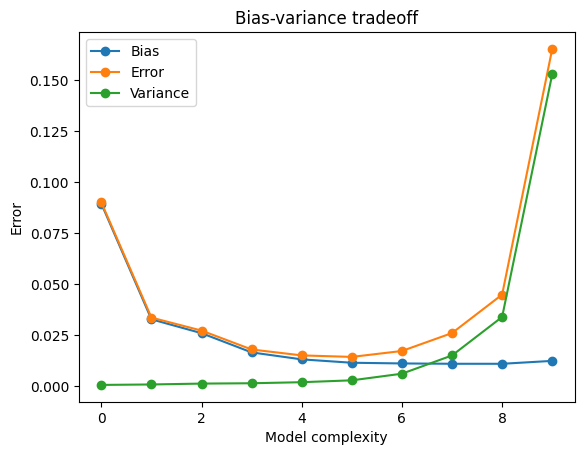

In [126]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso



# Number of bootstrap samples and max polynomial degree
n_boostraps = 200
maxdegree = 10

error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)

lam = 1e-4  

z = FrankeFunction(xm, ym, noisefactor=0.1)

x_flat = xm.flatten()
y_flat = ym.flatten()
z_flat = z.flatten()

# Initialize lists to store MSE for each model
mse_ols_cv = []
mse_ridge_cv = []
mse_lasso_cv = []

x_train,x_test,y_train,y_test,z_train,z_test = train_test_split(x_flat,y_flat,z_flat,test_size=0.2)
X_train = np.c_[x_train, y_train]
X_test = np.c_[x_test, y_test]
batch_size = 150  # Batches help introduce randomness in the data, leading to better estimates for 

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    z_pred = np.empty((z_test.shape[0], n_boostraps))

    mse = np.zeros(n_boostraps)

    for i in range(n_boostraps):
        X_, z_ = resample(X_train, z_train)
        indices = np.random.choice(len(X_train), size=batch_size, replace=True)
        X_batch = X_train[indices]
        z_batch = z_train[indices]
        
        z_pred[:, i] = model.fit(X_batch, z_batch).predict(X_test).ravel()


        mse[i] = mean_squared_error(z_test, z_pred[:, i]) 


    polydegree[degree] = degree
    error[degree] = np.mean(mse)  # Average MSE over bootstrap samples
    mean_prediction = np.mean(z_pred, axis=1)
    bias[degree] = np.mean((z_test - mean_prediction) ** 2)  # Calculate bias squared
    variance[degree] = np.mean(np.var(z_pred, axis=1))  # Calculate the average variance

  


    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Variance:', variance[degree])


plt.figure()
plt.plot(polydegree, bias,'-o', label='Bias')
plt.plot(polydegree, error, '-o',label='Error')
plt.plot(polydegree, variance, '-o',label='Variance')
plt.legend()
plt.xlabel('Model complexity')
plt.ylabel('Error')
plt.title('Bias-variance tradeoff')
plt.show()



Polynomial degree: 0
OLS Error: 0.09713121718060677 Bias^2: 0.09650560390504018 Variance: 0.000625613275566591
Ridge Error: 0.0971312226396152 Bias^2: 0.09650561019819881 Variance: 0.0006256124414163907
Lasso Error: 0.09713145074686069 Bias^2: 0.09650583747129408 Variance: 0.000625613275566591
Polynomial degree: 1
OLS Error: 0.03477373291212113 Bias^2: 0.03409766954080001 Variance: 0.0006760633713211246
Ridge Error: 0.03477377059842155 Bias^2: 0.03409772151710813 Variance: 0.0006760490813134121
Lasso Error: 0.0347746669049421 Bias^2: 0.03409869011862384 Variance: 0.0006759767863182592


/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.322e-03, tolerance: 2.786e-03
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.376e-03, tolerance: 3.689e-03
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

Polynomial degree: 2
OLS Error: 0.02894604849617037 Bias^2: 0.027669964826842038 Variance: 0.0012760836693283331
Ridge Error: 0.028945828697635175 Bias^2: 0.02767016631076441 Variance: 0.0012756623868707606
Lasso Error: 0.02894383065998621 Bias^2: 0.02767294573061642 Variance: 0.0012708849293697857


/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.219e+00, tolerance: 4.066e-03
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.213e+00, tolerance: 3.718e-03
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

Polynomial degree: 3
OLS Error: 0.01980232656241613 Bias^2: 0.01842465215800806 Variance: 0.0013776744044080704
Ridge Error: 0.019791823071058826 Bias^2: 0.018424230879345128 Variance: 0.0013675921917136974
Lasso Error: 0.02046701341401329 Bias^2: 0.019370065150461437 Variance: 0.001096948263551856


/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.464e+00, tolerance: 4.020e-03
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.370e-01, tolerance: 3.979e-03
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

Polynomial degree: 4
OLS Error: 0.016116890896174935 Bias^2: 0.014172255416513128 Variance: 0.0019446354796618104
Ridge Error: 0.016186157266679754 Bias^2: 0.014495106451592594 Variance: 0.0016910508150871611
Lasso Error: 0.020293548317752035 Bias^2: 0.018943829337053377 Variance: 0.0013497189806986553


/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.057e+00, tolerance: 3.677e-03
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.660e-01, tolerance: 3.468e-03
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

Polynomial degree: 5
OLS Error: 0.01499767057646501 Bias^2: 0.012210591695284883 Variance: 0.0027870788811801273
Ridge Error: 0.01540037222923729 Bias^2: 0.01348237415481653 Variance: 0.0019179980744207588
Lasso Error: 0.020426305564991868 Bias^2: 0.018836211069716488 Variance: 0.0015900944952753758


/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.134e+00, tolerance: 4.256e-03
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.069e+00, tolerance: 4.636e-03
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

Polynomial degree: 6
OLS Error: 0.017480726951923743 Bias^2: 0.011509337264622645 Variance: 0.005971389687301097
Ridge Error: 0.014870216286284566 Bias^2: 0.012846996798845559 Variance: 0.002023219487439005
Lasso Error: 0.020079662112842803 Bias^2: 0.018414421278326407 Variance: 0.0016652408345163958


/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.148e+00, tolerance: 4.370e-03
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.287e-01, tolerance: 3.556e-03
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

Polynomial degree: 7
OLS Error: 0.02460842849809403 Bias^2: 0.011087344159787455 Variance: 0.013521084338306571
Ridge Error: 0.014731609402967139 Bias^2: 0.012441005653780406 Variance: 0.002290603749186732
Lasso Error: 0.019712993153712555 Bias^2: 0.01788373584565411 Variance: 0.0018292573080584415


/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.824e-01, tolerance: 3.405e-03
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.059e+00, tolerance: 4.011e-03
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

Polynomial degree: 8
OLS Error: 0.05014142961837909 Bias^2: 0.011537627113361627 Variance: 0.038603802505017465
Ridge Error: 0.014898864330666237 Bias^2: 0.012195264733965538 Variance: 0.0027035995967006994
Lasso Error: 0.0194547854719119 Bias^2: 0.017446198974927413 Variance: 0.00200858649698449


/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.032e-01, tolerance: 4.018e-03
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.485e-01, tolerance: 3.721e-03
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

Polynomial degree: 9
OLS Error: 0.1564260508175474 Bias^2: 0.01299077885841128 Variance: 0.1434352719591361
Ridge Error: 0.01478536168666993 Bias^2: 0.012013907858306222 Variance: 0.002771453828363705
Lasso Error: 0.01902295756164707 Bias^2: 0.016965286120466373 Variance: 0.0020576714411806975


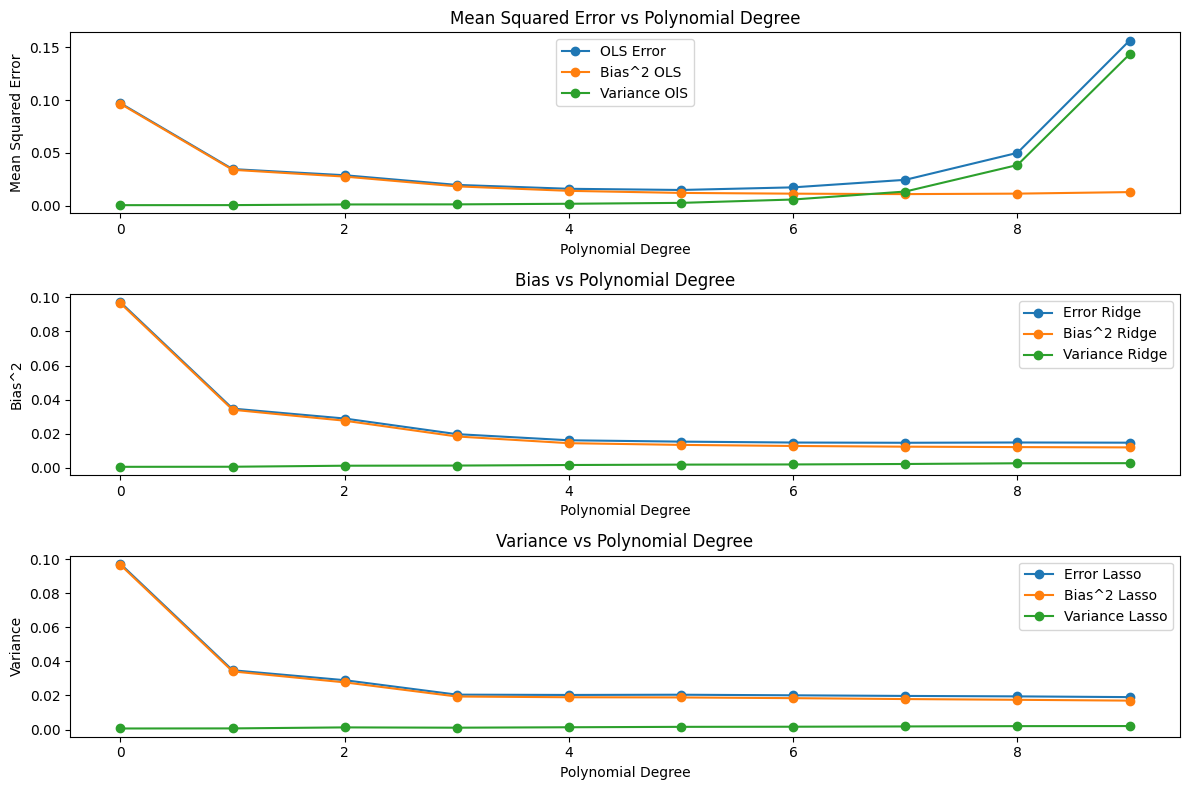

In [129]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Number of bootstrap samples and max polynomial degree
n_boostraps = 200
maxdegree = 10

# Initialize arrays to store errors, biases, and variances for each model
error_ols = np.zeros(maxdegree)
bias_ols = np.zeros(maxdegree)
variance_ols = np.zeros(maxdegree)

error_ridge = np.zeros(maxdegree)
bias_ridge = np.zeros(maxdegree)
variance_ridge = np.zeros(maxdegree)

error_lasso = np.zeros(maxdegree)
bias_lasso = np.zeros(maxdegree)
variance_lasso = np.zeros(maxdegree)

z = FrankeFunction(xm, ym, noisefactor=0.1)

x_flat = xm.flatten()
y_flat = ym.flatten()
z_flat = z.flatten()


x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x_flat, y_flat, z_flat, test_size=0.2)
X_train = np.c_[x_train, y_train]
X_test = np.c_[x_test, y_test]

for degree in range(maxdegree):
    z_pred = np.empty((z_test.shape[0], n_boostraps, 3))

    models = {
        'OLS': LinearRegression(fit_intercept=False),
        'Ridge': Ridge(alpha=lam),
        'Lasso': Lasso(alpha=lam)
    }

    mse = np.zeros((n_boostraps, 3)) 

    for i in range(n_boostraps):
        X_, z_ = resample(X_train, z_train)
        indices = np.random.choice(len(X_train), size=batch_size, replace=True)
        X_batch = X_[indices]
        z_batch = z_[indices]

        for j, (model_name, model) in enumerate(models.items()):
            z_pred[:, i, j] = model.fit(PolynomialFeatures(degree=degree).fit_transform(X_batch), z_batch).predict(PolynomialFeatures(degree=degree).fit_transform(X_test))
            mse[i, j] = mean_squared_error(z_test, z_pred[:, i, j])

    # Calculate average error, bias, and variance for each model
    for j, model_name in enumerate(models.keys()):
        error = np.mean(mse[:, j])
        bias = np.mean((z_test - np.mean(z_pred[:, :, j], axis=1)) ** 2)
        variance = np.mean(np.var(z_pred[:, :, j], axis=1))

        if model_name == 'OLS':
            error_ols[degree] = error
            bias_ols[degree] = bias
            variance_ols[degree] = variance
        elif model_name == 'Ridge':
            error_ridge[degree] = error
            bias_ridge[degree] = bias
            variance_ridge[degree] = variance
        elif model_name == 'Lasso':
            error_lasso[degree] = error
            bias_lasso[degree] = bias
            variance_lasso[degree] = variance

    print(f'Degree: {degree}, OLS Error: {error_ols[degree]:.4f}, Bias^2: {bias_ols[degree]:.4f}, Variance: {variance_ols[degree]:.4f}')
    print(f'       Ridge Error: {error_ridge[degree]:.4f}, Bias^2: {bias_ridge[degree]:.4f}, Variance: {variance_ridge[degree]:.4f}')
    print(f'       Lasso Error: {error_lasso[degree]:.4f}, Bias^2: {bias_lasso[degree]:.4f}, Variance: {variance_lasso[degree]:.4f}')

plt.figure()
plt.plot(range(maxdegree), bias_ols, '-o', label='OLS Bias')
plt.plot(range(maxdegree), error_ols, '-o', label='OLS Error')
plt.plot(range(maxdegree), variance_ols, '-o', label='OLS Variance')
# Similarly for Ridge and Lasso...
plt.legend()
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.show()


<h2>Part f): Cross-validation as resampling techniques, adding more complexity</h2>

In [67]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Define the number of folds
k = 5

# Initialize KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store MSE for each model
mse_ols_cv = []
mse_ridge_cv = []
mse_lasso_cv = []

# Define lambda values for Ridge and Lasso
lambda_ridge = BestVals['Lambda Ridge']
lambda_lasso = BestVals['Lambda Lasso']

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    z_train, z_test = z_flat[train_index], z_flat[test_index]
    
    # OLS
    beta_ols = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train
    z_pred_ols = X_test @ beta_ols
    mse_ols_cv.append(mean_squared_error(z_test, z_pred_ols))
    
    # Ridge
    ridge = Ridge(alpha=lambda_ridge, fit_intercept=False)
    ridge.fit(X_train, z_train)
    z_pred_ridge = ridge.predict(X_test)
    mse_ridge_cv.append(mean_squared_error(z_test, z_pred_ridge))
    
    # Lasso
    lasso = Lasso(alpha=lambda_lasso, max_iter=int(1e5), tol=1e-4, fit_intercept=False)
    lasso.fit(X_train, z_train)
    z_pred_lasso = lasso.predict(X_test)
    mse_lasso_cv.append(mean_squared_error(z_test, z_pred_lasso))

# Calculate the mean MSE for each model
mean_mse_ols_cv = np.mean(mse_ols_cv)
mean_mse_ridge_cv = np.mean(mse_ridge_cv)
mean_mse_lasso_cv = np.mean(mse_lasso_cv)

# Print the results
print(f"Mean MSE from k-fold cross-validation (k={k}):")
print(f"OLS: {mean_mse_ols_cv:.4f}")
print(f"Ridge: {mean_mse_ridge_cv:.4f}")
print(f"Lasso: {mean_mse_lasso_cv:.4f}")

# Compare with the MSE from bootstrap
'''THIS ISNT WORKING'''
print("\nMSE from bootstrap:")
print(f"OLS: {BestVals['MSE OLS']:.4f}")
print(f"Ridge: {BestVals['MSE Ridge']:.4f}")
print(f"Lasso: {BestVals['MSE Lasso']:.4f}")


/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.099e+00, tolerance: 1.957e-01
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.872e+00, tolerance: 1.941e-01
  model = cd_fast.enet_coordinate_descent(
/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

Mean MSE from k-fold cross-validation (k=5):
OLS: 0.0021
Ridge: 0.0021
Lasso: 0.0040

MSE from bootstrap:
OLS: 0.0023
Ridge: 0.0023
Lasso: 0.0041


/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.054e+00, tolerance: 1.991e-01
  model = cd_fast.enet_coordinate_descent(


<h2>Part g): Analysis of real data</h2>

(8, 100)
(8, 1)
Polynomial degree: 0
Error: 0.3214960170351912
Bias^2: 0.3123314713548606
Var: 0.009164545680330616
0.3214960170351912 >= 0.3123314713548606 + 0.009164545680330616 = 0.3214960170351912
(8, 100)
(8, 1)
Polynomial degree: 1
Error: 0.08426840630693411
Bias^2: 0.07968918676726028
Var: 0.004579219539673834
0.08426840630693411 >= 0.07968918676726028 + 0.004579219539673834 = 0.08426840630693411
(8, 100)
(8, 1)
Polynomial degree: 2
Error: 0.10398646080125035
Bias^2: 0.10077114273548984
Var: 0.00321531806576051
0.10398646080125035 >= 0.10077114273548984 + 0.00321531806576051 = 0.10398646080125035
(8, 100)
(8, 1)
Polynomial degree: 3
Error: 0.06547790180152357
Bias^2: 0.06208238634231949
Var: 0.0033955154592041075
0.06547790180152357 >= 0.06208238634231949 + 0.0033955154592041075 = 0.0654779018015236
(8, 100)
(8, 1)
Polynomial degree: 4
Error: 0.06844519414009444
Bias^2: 0.06453579006728319
Var: 0.003909404072811218
0.06844519414009444 >= 0.06453579006728319 + 0.00390940407281121

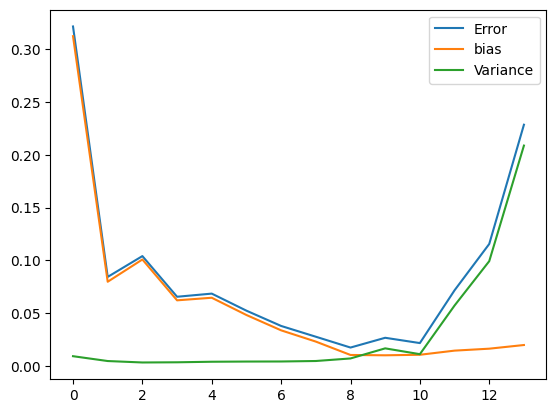

In [68]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 40
n_boostraps = 100
maxdegree = 14


# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)

        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()


    print(y_pred.shape)
    print(y_test.shape)
    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
plt.show()